In [5]:
from MetaMHN.np.kronvec import kron_diag as get_diag_paired
import numpy as np
from MetaMHN.model import bits_fixed_n, MetMHN
import itertools
from scipy.linalg.blas import dcopy, dscal, daxpy
import pandas as pd
from historytree import HistoryTreeF
import matplotlib.pyplot as plt

log_theta = pd.read_csv(
    R"results\luad\luad_16_muts_5_cnvs_0028.csv", index_col=0)
events = log_theta.index
tau1, tau2 = np.exp(log_theta["Sampling"][:2])
log_theta = log_theta.drop(columns=["Sampling"]).to_numpy()
mmhn = MetMHN(log_theta=log_theta, tau1=tau1, tau2=tau2)

patients = pd.read_csv(
    R"data\luad\G13_LUAD_PM_v2_Events_20and15_Full.csv", index_col=0)
paired = patients[patients["paired"]==1].drop(columns=["P.AgeAtSeqRep", "M.AgeAtSeqRep"])

KeyError: 'Sampling'

In [3]:
order_probs = [mmhn._likeliest_order_paired(state=row.to_numpy()) for i, row in paired.iloc[:,:-56].iterrows()
]

In [4]:
def paired_orders_to_single(orders):
    singles = list()
    for order in orders:
        o_pt = list()
        o_met = list()
        for o in order:
            if o % 2 == 0:
                o_pt.append(o // 2)
                if o == 2 * mmhn.n:
                    o_met.append(o // 2)
            else:
                o_met.append(o // 2)
        singles += [tuple(o_pt), tuple(o_met)]
    return singles

In [5]:
tree = HistoryTree.from_orders(
    paired_orders_to_single([o for o,p in order_probs])
)

c:\Users\Hu\anaconda3\envs\mhn_env\lib\site-packages\matplotlib\cbook\__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


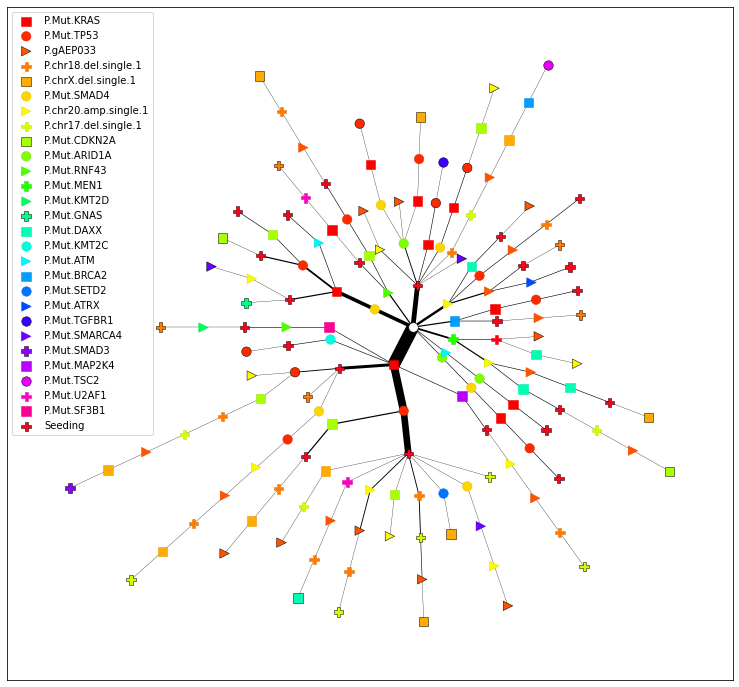

In [6]:
f,a = plt.subplots(figsize=(13,13))
a.set_aspect("equal")
tree.events = list(range(len(events)))
tree.event_dict = {i: e for i, e in enumerate(events)}
tree.draw(ax=a, node_scale=90, edge_scale=0.3)
a.legend()
f.savefig("paired.png", dpi=600)